<a href="https://colab.research.google.com/github/iremaricii/DuyguTahmin/blob/main/DuyguTahmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -l fer2013.zip


In [ ]:
!unzip fer2013.zip


In [ ]:
!ls


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/train"
test_dir = "/content/test"

# Tüm görselleri 48x48'e çek ve normalize et (0-1 aralığına)
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64,
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64,
    subset='validation',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64,
    shuffle=False
)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')  # 7 sınıf için softmax çıkış katmanı
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25
)


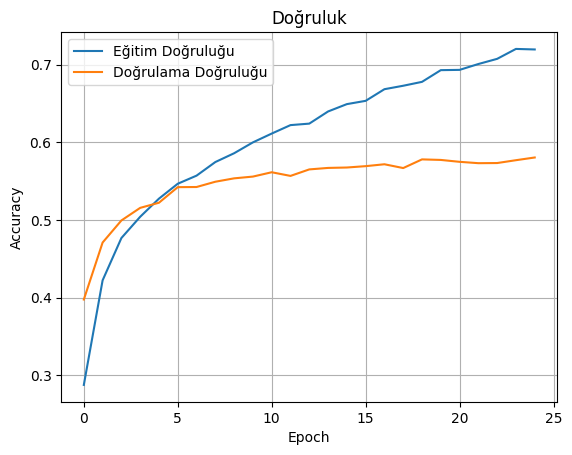

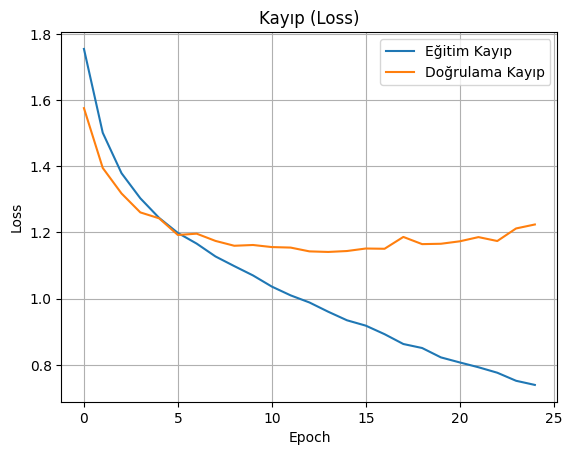

In [36]:
import matplotlib.pyplot as plt

# Doğruluk grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Kayıp grafiği
plt.plot(history.history['loss'], label='Eğitim Kayıp')
plt.plot(history.history['val_loss'], label='Doğrulama Kayıp')
plt.title('Kayıp (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [37]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test doğruluğu: {test_acc:.4f}")


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5216 - loss: 1.3908
Test doğruluğu: 0.5822


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


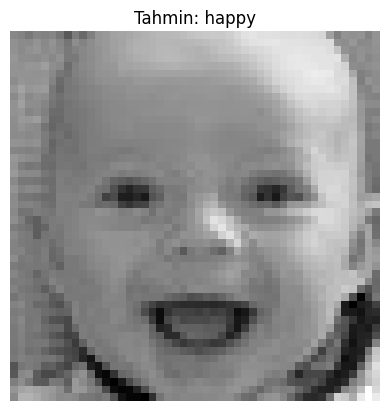

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import random

# Sınıf isimleri
class_names = list(train_generator.class_indices.keys())

# Test setinden rastgele bir görsel seç
img_path = test_generator.filepaths[random.randint(0, len(test_generator.filepaths)-1)]

# Görseli yükle ve işle
img = image.load_img(img_path, target_size=(48, 48), color_mode="grayscale")
img_array = image.img_to_array(img) / 255.0
img_array_expanded = np.expand_dims(img_array, axis=0)  # [1, 48, 48, 1]

# Tahmin yap
pred = model.predict(img_array_expanded)
predicted_label = class_names[np.argmax(pred)]

# Görseli göster
plt.imshow(img_array.squeeze(), cmap='gray')
plt.title(f"Tahmin: {predicted_label}")
plt.axis('off')
plt.show()


In [ ]:
model.save("duygu_modeli.h5")


In [ ]:
pip install opencv-python tensorflow
